In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task-01-nba-matches-winner-prediction/1.png
/kaggle/input/task-01-nba-matches-winner-prediction/2.png
/kaggle/input/task-01-nba-matches-winner-prediction/3.png
/kaggle/input/task-01-nba-matches-winner-prediction/test_without_label.csv
/kaggle/input/task-01-nba-matches-winner-prediction/train_full.csv


---

## Carregamento

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df_train = pd.read_csv('/kaggle/input/task-01-nba-matches-winner-prediction/train_full.csv')

df_train.columns = df_train.columns.str.lower() \
    .str.strip() \
    .str.replace(' ', '_')

df_real_test = pd.read_csv('/kaggle/input/task-01-nba-matches-winner-prediction/test_without_label.csv')
df_real_test.columns = df_real_test.columns.str.lower() \
    .str.strip() \
    .str.replace(' ', '_')

In [4]:
df_train

,game,data,h_team,h_wins,h_loss,h_w/d_%,h_srs,h_games,h_totalpoints,h_avgpointspergame,...,a_ts%,a_efg%,a_tov%,a_orb%,a_ft/fga,a_oefg%,a_otov%,a_drb%,a_oft/fga,winorlose
0,0,"Thu, June 8",Miami Heat,52,30,0.634,3.59,82,8191,99.9,...,0.550,0.495,13.1,31.8,0.285,0.475,13.7,72.2,0.257,L
1,1,"Sun, June 11",Miami Heat,52,30,0.634,3.59,82,8191,99.9,...,0.550,0.495,13.1,31.8,0.285,0.475,13.7,72.2,0.257,L
2,2,"Tue, June 13",Dallas Mavericks,60,22,0.732,5.96,82,8130,99.1,...,0.556,0.517,13.9,26.7,0.254,0.477,12.4,76.4,0.251,L
3,3,"Thu, June 15",Dallas Mavericks,60,22,0.732,5.96,82,8130,99.1,...,0.556,0.517,13.9,26.7,0.254,0.477,12.4,76.4,0.251,L
4,4,"Sun, June 18",Dallas Mavericks,60,22,0.732,5.96,82,8130,99.1,...,0.556,0.517,13.9,26.7,0.254,0.477,12.4,76.4,0.251,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,1001,"Fri, April 21",Los Angeles Clippers,51,31,0.622,4.42,82,8911,108.7,...,0.563,0.526,13.2,23.2,0.215,0.493,11.8,78.9,0.195,W
1002,1002,"Sun, April 23",Los Angeles Clippers,51,31,0.622,4.42,82,8911,108.7,...,0.563,0.526,13.2,23.2,0.215,0.493,11.8,78.9,0.195,L
1003,1003,"Tue, April 25",Utah Jazz,51,31,0.622,4.00,82,8258,100.7,...,0.574,0.537,12.0,21.5,0.233,0.506,12.1,76.9,0.211,W
1004,1004,"Fri, April 28",Los Angeles Clippers,51,31,0.622,4.42,82,8911,108.7,...,0.563,0.526,13.2,23.2,0.215,0.493,11.8,78.9,0.195,W


# EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

## Formato dos dados

In [6]:
_ = df_train.shape
print(f'{_[0]} linhas x {_[1]} colunas')

1006 linhas x 135 colunas


### Tipos dos dados

In [7]:
def pprint_series(series: pd.Series, rounding: int = 3, ascending: bool = False):
    def print_header():
        print(f'col {" "*18} dtype', end='')
        for i in range(4):
            print(f'{" "*11} col {" "*18} dtype', end='')
        print('\n')
    
    def print_dtypes(series: pd.Series):
        c = 0
        for i, v in series.sort_values(ascending=ascending).items():
            if isinstance(v, float):
                v = round(v, rounding)
            if c <= 3:
                print(f'{i[:23]:<23}{v}', end='\t|\t')
                c += 1
                continue
            print(f'{i[:23]:<23}{v}')
            c = 0
            
    print_header()
    print_dtypes(series)
        
pprint_series(df_train.dtypes)

col                    dtype            col                    dtype            col                    dtype            col                    dtype            col                    dtype

winorlose              object	|	h_team                 object	|	data                   object	|	a_team                 object	|	a_tov                  float64
a_orb                  float64	|	a_drb                  float64	|	a_trb                  float64	|	a_ast                  float64	|	a_blk                  float64
a_avgpointspergameopp  float64	|	a_pf                   float64	|	a_fta                  float64	|	a_ofg                  float64	|	a_ofga                 float64
a_ofg%                 float64	|	a_ft%                  float64	|	a_2p%                  float64	|	a_ft                   float64	|	a_o3pa                 float64
a_2pa                  float64	|	a_2p                   float64	|	a_3p%                  float64	|	a_3pa                  float64	|	a_3p                   float64

## Dados faltantes

### Por colunas

In [8]:
pprint_series(df_train.isnull().sum())

col                    dtype            col                    dtype            col                    dtype            col                    dtype            col                    dtype

game                   0	|	a_ft                   0	|	a_ofg%                 0	|	a_ofga                 0	|	a_ofg                  0
a_avgpointspergameopp  0	|	a_pointsopp            0	|	a_pf                   0	|	a_tov                  0	|	a_blk                  0
a_ast                  0	|	a_trb                  0	|	a_drb                  0	|	a_orb                  0	|	a_ft%                  0
a_fta                  0	|	a_2p%                  0	|	a_o3pa                 0	|	a_2pa                  0	|	a_2p                   0
a_3p%                  0	|	a_3pa                  0	|	a_3p                   0	|	a_fg%                  0	|	a_fga                  0
a_fg                   0	|	a_avgpointspergame     0	|	a_totalpoints          0	|	a_games                0	|	a_srs                  0
a_w/d_%     

### Totais

In [9]:
print(f'Ao todo, os dados possuem {df_train.isnull().sum().sum()} valores nulos.')

Ao todo, os dados possuem 0 valores nulos.


## Significado das colunas

In [10]:
from IPython.display import Image

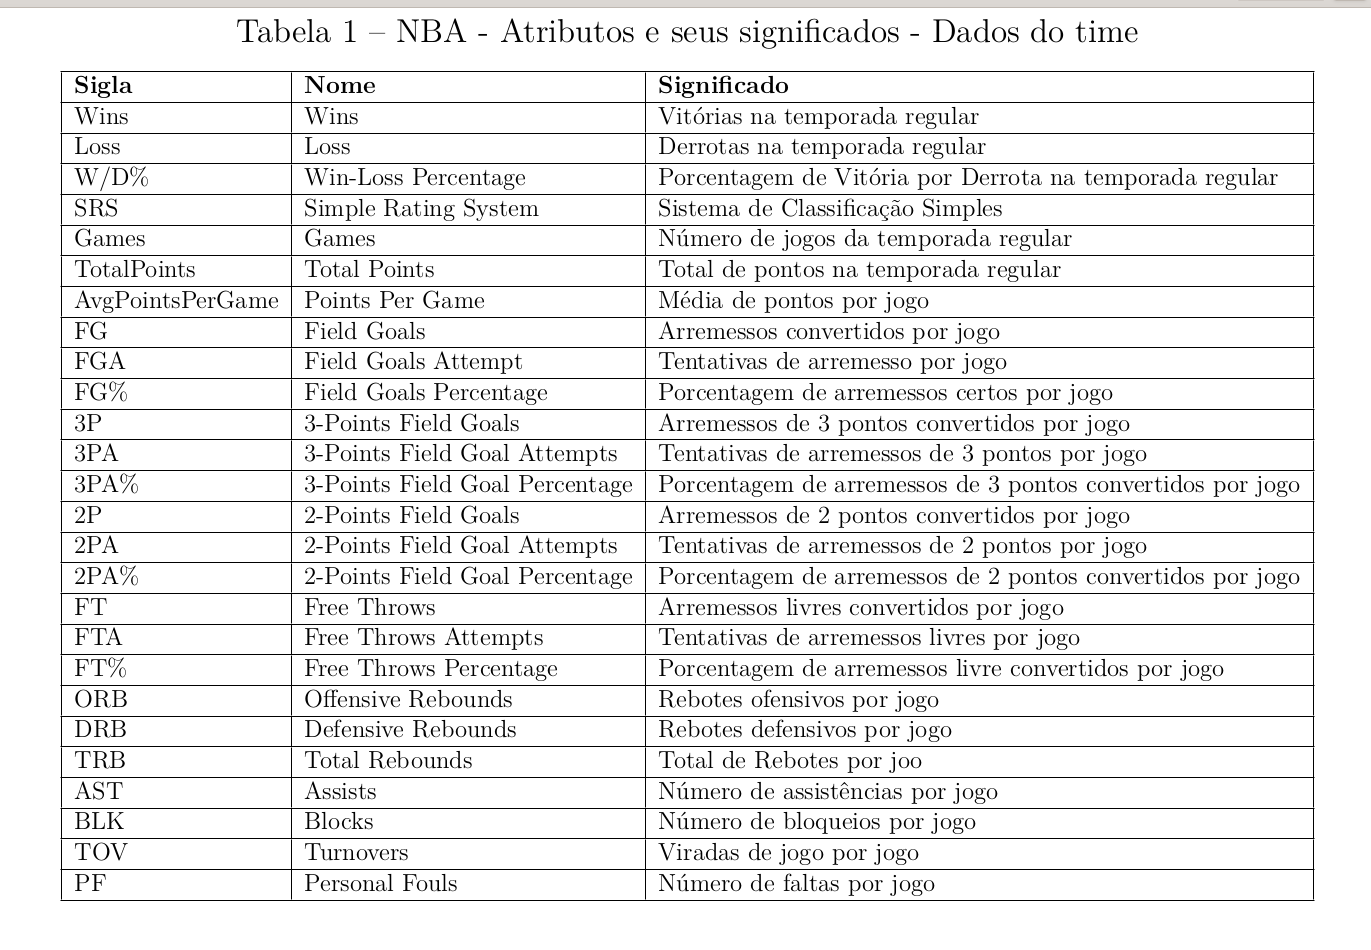

In [11]:
Image('/kaggle/input/task-01-nba-matches-winner-prediction/1.png')

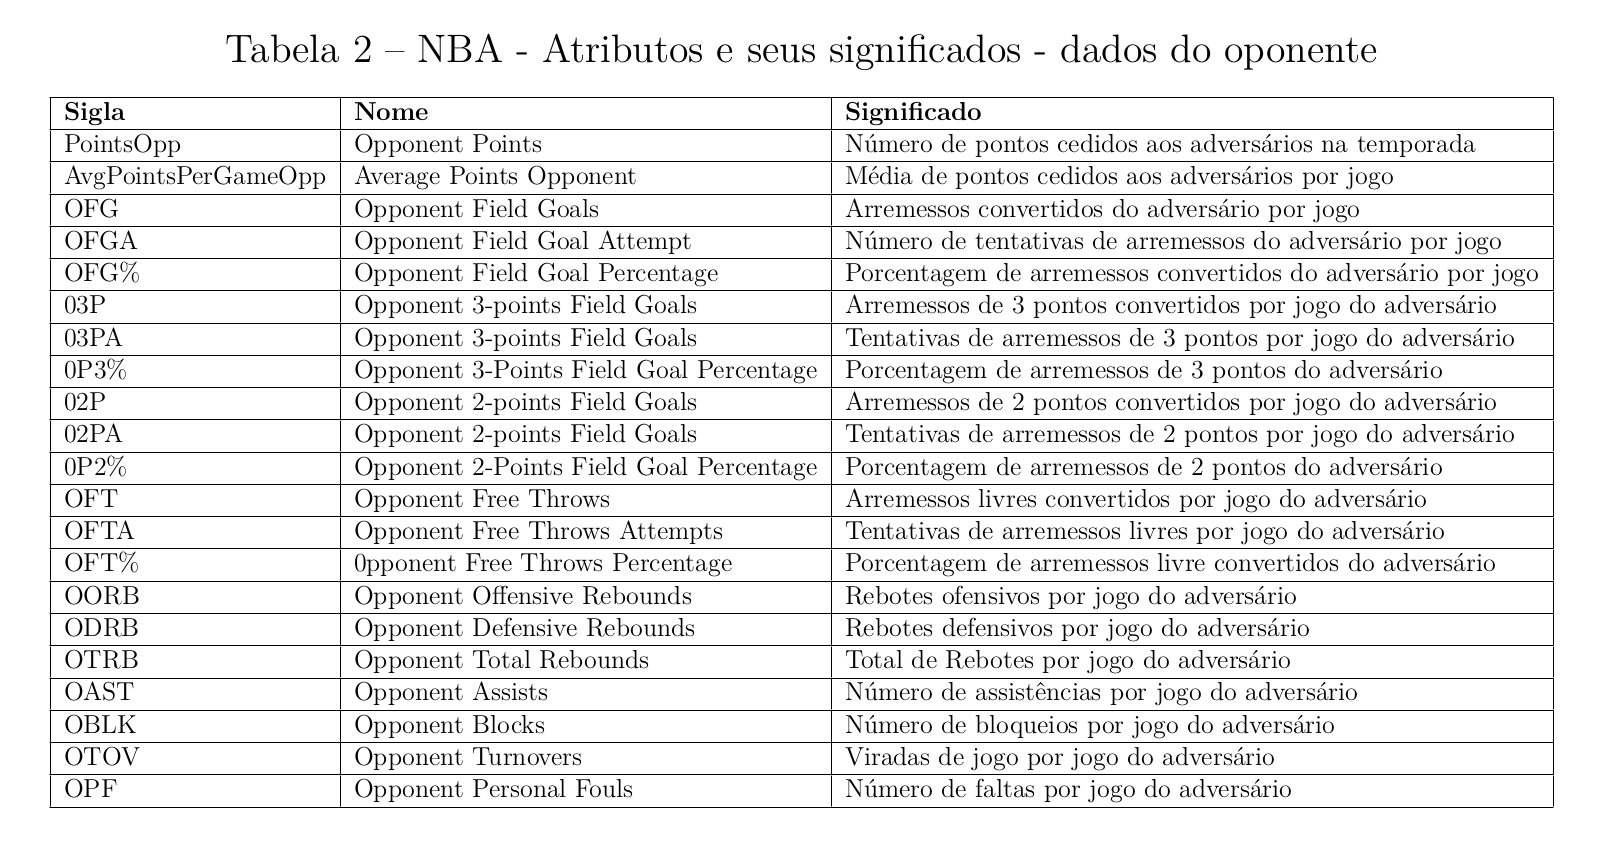

In [12]:
Image('/kaggle/input/task-01-nba-matches-winner-prediction/2.png')

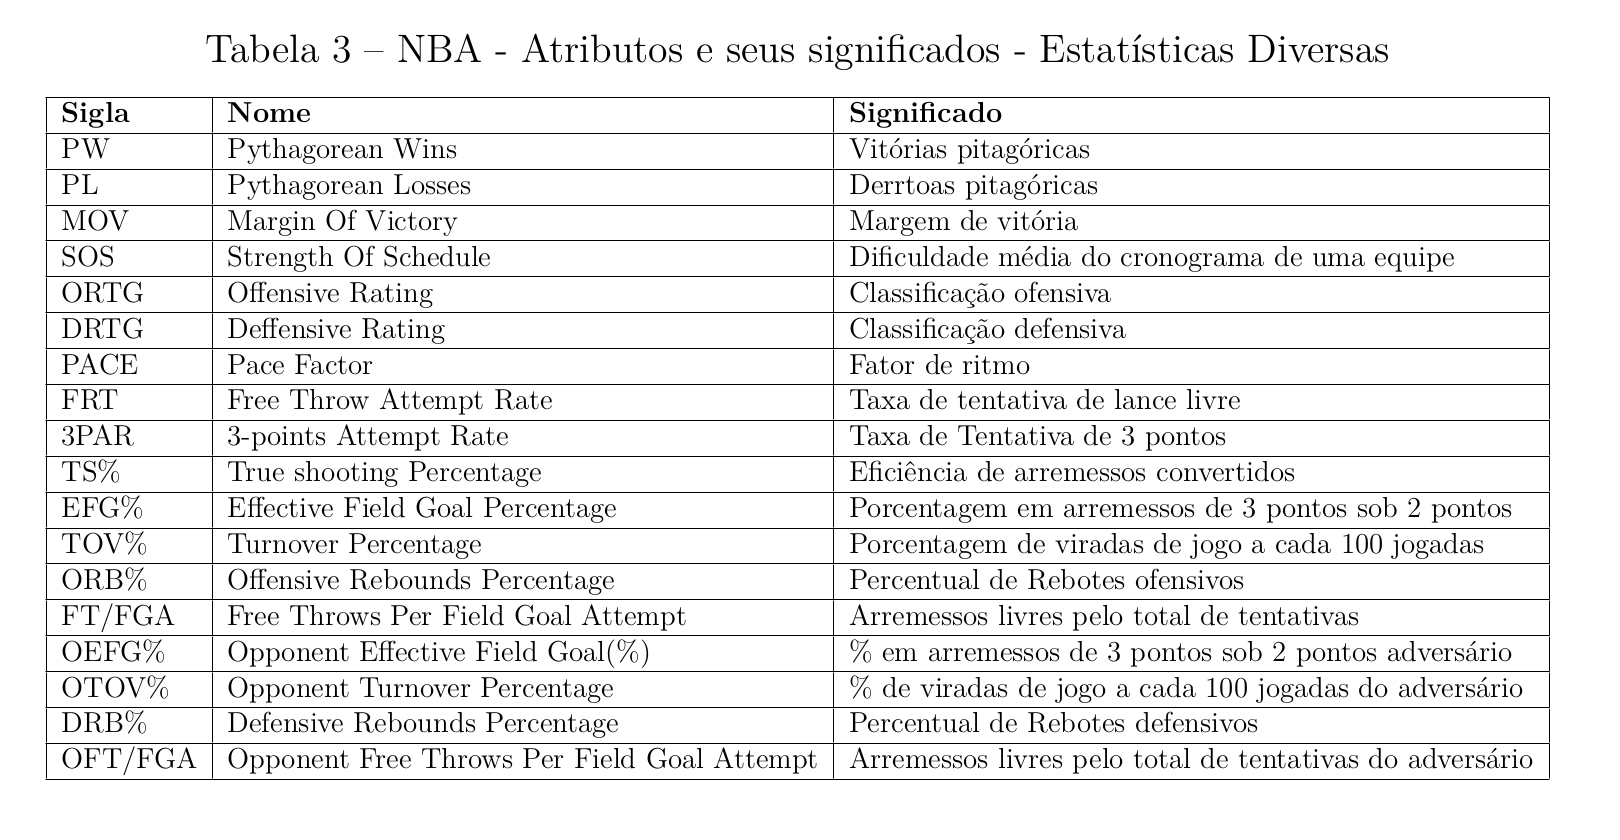

In [13]:
Image('/kaggle/input/task-01-nba-matches-winner-prediction/3.png')

## Análise estatística

Nas análises a seguir, apenas as colunas referentes ao time da casa serão utilizadas. <br>
Como elas significam as mesmas coisas para o time visitante, podemos reduzir o número de <i> features </i> a serem visualizadas. <br>
Na geração do modelo, as <i> features </i> do time visitante serão reinseridas.

In [14]:
h_team_cols = df_train.columns[df_train.columns.str.startswith('h_')]
df_stat = df_train[h_team_cols]

### describe() genérico

In [15]:
with pd.option_context('display.max_columns', 150):
    display(df_stat.describe())

,h_wins,h_loss,h_w/d_%,h_srs,h_games,h_totalpoints,h_avgpointspergame,h_fg,h_fga,h_fg%,h_3p,h_3pa,h_3p%,h_2p,h_2pa,h_2p%,h_ft,h_fta,h_ft%,h_orb,h_drb,h_trb,h_ast,h_blk,h_tov,h_pf,h_pointsopp,h_avgpointspergameopp,h_ofg,h_ofga,h_ofg%,h_o3p,h_o3pa,h_o3p%,h_o2p,h_o2pa,h_o2p%,h_oft,h_ofta,h_oft%,h_oorb,h_odrb,h_otrb,h_oast,h_oblk,h_otov,h_opf,h_pw,h_pl,h_mov,h_sos,h_ortg,h_drtg,h_pace,h_ftr,h_3par,h_ts%,h_efg%,h_tov%,h_orb%,h_ft/fga,h_oefg%,h_otov%,h_drb%,h_oft/fga
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.00000,1006.000000,1006.000000,1006.00000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,51.893638,28.757455,0.643335,3.985050,80.651093,8196.757455,101.566302,37.769284,81.407157,0.464050,7.624453,20.821968,0.364473,30.152783,60.587376,0.498336,18.412922,24.230219,0.760548,10.665010,31.911730,42.574652,22.266402,5.045229,14.125646,20.387575,7861.508946,97.415905,36.463718,81.899801,0.44522,6.820676,19.523559,0.34901,29.642147,62.370676,0.475611,17.670378,23.428926,0.754445,10.862127,30.591054,41.455567,20.738469,4.517694,14.420775,20.892147,51.351889,29.299205,4.154056,-0.168748,108.903479,104.450795,92.567694,0.298467,0.255010,0.551552,0.510667,13.303976,25.845229,0.226696,0.486738,13.525547,74.580318,0.216346
std,7.876258,7.399531,0.089563,2.875779,4.425900,648.264691,4.796339,1.734026,2.981256,0.014572,2.023956,5.123269,0.018938,1.939613,4.424251,0.019945,1.984435,2.656808,0.030430,1.305666,1.691024,1.919765,2.179183,0.797104,1.059625,1.597995,615.142572,4.463939,1.761322,3.359750,0.01120,1.335907,3.674109,0.01370,1.476520,3.295102,0.015307,1.811549,2.413430,0.013462,0.852008,1.723366,1.915167,1.674384,0.706420,1.256409,1.469609,7.892022,7.528449,2.908377,0.353751,2.981234,2.681073,2.869926,0.037699,0.057928,0.018249,0.019886,0.916365,2.910734,0.027801,0.014845,1.115095,1.853444,0.026542
min,35.000000,9.000000,0.451000,-3.130000,66.000000,6062.000000,91.800000,33.500000,74.300000,0.432000,3.500000,10.300000,0.317000,24.300000,46.900000,0.455000,13.500000,18.000000,0.660000,7.600000,27.200000,36.900000,18.000000,3.300000,11.200000,16.800000,5819.000000,88.200000,32.400000,75.300000,0.41900,3.700000,10.800000,0.30800,25.000000,50.800000,0.442000,13.700000,18.400000,0.725000,8.800000,26.700000,36.300000,16.300000,3.000000,11.300000,16.200000,33.000000,15.000000,-2.880000,-0.950000,101.000000,98.200000,86.300000,0.206000,0.131000,0.510000,0.470000,10.900000,19.100000,0.161000,0.450000,10.700000,69.600000,0.158000
25%,46.000000,24.000000,0.585000,1.877500,82.000000,7993.000000,98.025000,36.500000,79.000000,0.454000,6.100000,17.500000,0.352000,29.100000,58.100000,0.483000,17.100000,22.400000,0.744000,9.800000,30.700000,41.400000,20.800000,4.400000,13.600000,19.300000,7659.000000,94.400000,35.100000,79.100000,0.43700,5.900000,16.900000,0.34200,28.400000,59.700000,0.465000,16.300000,21.600000,0.745000,10.300000,29.300000,40.100000,19.500000,4.100000,13.500000,19.800000,46.000000,23.000000,1.850000,-0.417500,106.700000,102.900000,90.400000,0.268000,0.217000,0.538000,0.496000,12.600000,24.000000,0.206000,0.477000,12.800000,73.300000,0.197000
50%,52.000000,28.000000,0.646000,3.815000,82.000000,8275.000000,101.150000,37.400000,81.400000,0.462000,7.300000,19.900000,0.363000,30.300000,60.900000,0.497000,18.200000,24.100000,0.763000,10.600000,31.900000,42.700000,22.150000,5.100000,14.100000,20.

> Análises estatísticas aprofundadas são inviáveis, devido ao limite de tempo e a grande quantidade de colunas

### Correlação com a taxa de vitórias

> Uma análise das correlações de todas as colunas com todas as outras colunas seria inviável.

In [16]:
_corr = df_stat.corr()['h_w/d_%']
pprint_series(_corr)

cols_corr = _corr[(_corr.values > 0.5) & (_corr.values != 1)].index.to_list()

col                    dtype            col                    dtype            col                    dtype            col                    dtype            col                    dtype

h_w/d_%                1.0	|	h_wins                 0.933	|	h_mov                  0.927	|	h_srs                  0.925	|	h_pw                   0.872
h_ortg                 0.6	|	h_ts%                  0.564	|	h_efg%                 0.548	|	h_3p%                  0.522	|	h_fg%                  0.521
h_2p%                  0.442	|	h_avgpointspergame     0.367	|	h_fg                   0.333	|	h_blk                  0.328	|	h_drb                  0.277
h_ast                  0.273	|	h_3p                   0.267	|	h_totalpoints          0.24	|	h_3par                 0.188	|	h_o2pa                 0.183
h_3pa                  0.171	|	h_ft%                  0.155	|	h_trb                  0.148	|	h_ofga                 0.115	|	h_drb%                 0.112
h_pace                 0.058	|	h_ft/fga           

#### Correlações positivas

<AxesSubplot:>

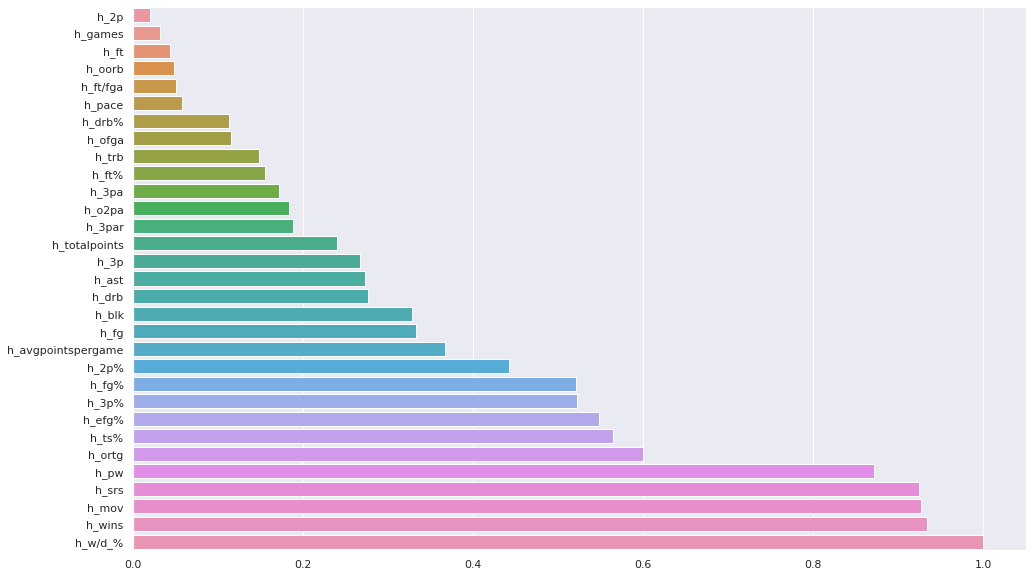

In [17]:
_ = _corr[_corr.values > 0].sort_values()
sns.set(rc={'figure.figsize':(16, 10)})
sns.barplot(x=_.values, y=_.index)

In [18]:
print(f'''
    Correlações positivas
    Total colunas: {_.count()}
    Colunas com correlação fraca: {_[(_.values < 0.2) & (_.values >= 0)].count()}
    Colunas com correlação média: {_[(_.values < 0.5) & (_.values >= 0.2)].count()}
    Colunas com correlação forte: {_[(_.values >= 0.5)].count()}
''')


    Correlações positivas
    Total colunas: 31
    Colunas com correlação fraca: 13
    Colunas com correlação média: 8
    Colunas com correlação forte: 10



#### Correlações negativas

<AxesSubplot:>

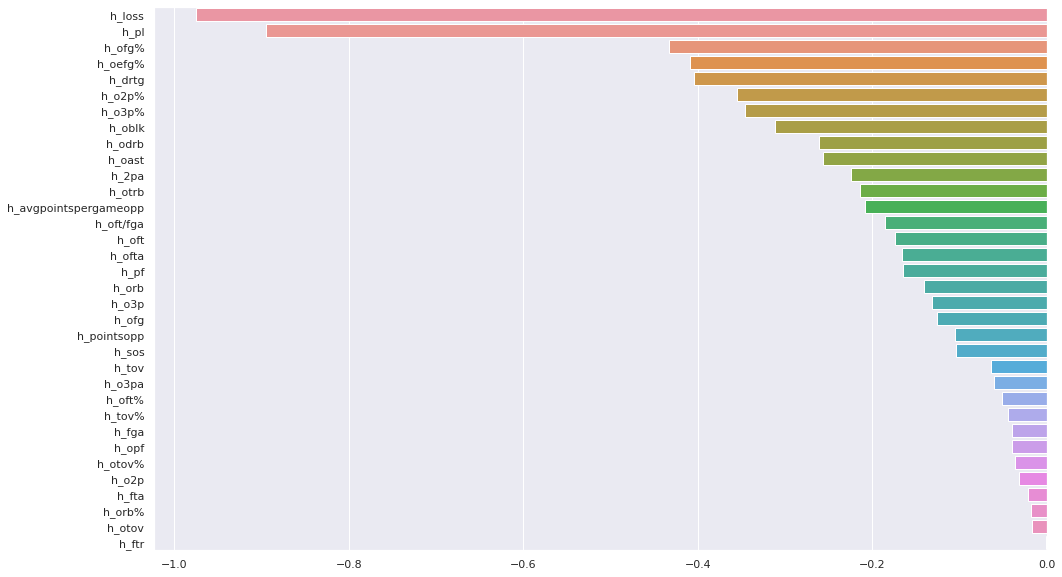

In [19]:
_ = _corr[_corr.values < 0].sort_values()
sns.set(rc={'figure.figsize':(16, 10)})
sns.barplot(x=_.values, y=_.index)

In [20]:
print(f'''
    Total colunas: {_.count()}
    Colunas com correlação fraca: {_[(_.values > -0.2) & (_.values <= 0)].count()}
    Colunas com correlação média: {_[(_.values > -0.5) & (_.values <= -0.2)].count()}
    Colunas com correlação forte: {_[(_.values <= -0.5)].count()}
''')


    Total colunas: 34
    Colunas com correlação fraca: 21
    Colunas com correlação média: 11
    Colunas com correlação forte: 2



Ignorando a correlação consigo mesma, que sempre será 1, podemos ver que, das 64 colunas:
- 13 possuem uma fraca correlação com a taxa de vitórias (coef. corr < 0.2);
- 8 possuem uma correlação média (coef. corr < 0.5);
- 10 possuem uma forte correlação (coef. corr > 0.5);

### Variância e desvio padrão

#### Desvio padrão

In [21]:
_std = df_stat.std(numeric_only=True)
_std = _std[_std.values < 100]
pprint_series(_std)

col                    dtype            col                    dtype            col                    dtype            col                    dtype            col                    dtype

h_pw                   7.892	|	h_wins                 7.876	|	h_pl                   7.528	|	h_loss                 7.4	|	h_3pa                  5.123
h_avgpointspergame     4.796	|	h_avgpointspergameopp  4.464	|	h_games                4.426	|	h_2pa                  4.424	|	h_o3pa                 3.674
h_ofga                 3.36	|	h_o2pa                 3.295	|	h_fga                  2.981	|	h_ortg                 2.981	|	h_orb%                 2.911
h_mov                  2.908	|	h_srs                  2.876	|	h_pace                 2.87	|	h_drtg                 2.681	|	h_fta                  2.657
h_ofta                 2.413	|	h_ast                  2.179	|	h_3p                   2.024	|	h_ft                   1.984	|	h_2p                   1.94
h_trb                  1.92	|	h_otrb              

In [22]:
print(f'''
    Total de colunas: {_std.count()}
    Colunas entre 0 e 1 desvios da média: {_std[(_std.values >= 0) & (_std.values < 1)].count()}
    Colunas entre 1 e 2 desvios da média: {_std[(_std.values >= 1) & (_std.values < 2)].count()}
    Colunas entre 2 e 3 desvios da média: {_std[(_std.values >= 2) & (_std.values < 3)].count()}
    Colunas acima de 3 desvios da média: {_std[(_std.values >= 3)].count()}
''')


    Total de colunas: 63
    Colunas entre 0 e 1 desvios da média: 21
    Colunas entre 1 e 2 desvios da média: 19
    Colunas entre 2 e 3 desvios da média: 11
    Colunas acima de 3 desvios da média: 12



#### Variância

In [23]:
_var = df_stat.var(numeric_only=True)
_var = _var[_var.values < 100]
pprint_series(_var)

cols_var = _var[_var.values > 0.2].index.to_list()

col                    dtype            col                    dtype            col                    dtype            col                    dtype            col                    dtype

h_pw                   62.284	|	h_wins                 62.035	|	h_pl                   56.678	|	h_loss                 54.753	|	h_3pa                  26.248
h_avgpointspergame     23.005	|	h_avgpointspergameopp  19.927	|	h_games                19.589	|	h_2pa                  19.574	|	h_o3pa                 13.499
h_ofga                 11.288	|	h_o2pa                 10.858	|	h_fga                  8.888	|	h_ortg                 8.888	|	h_orb%                 8.472
h_mov                  8.459	|	h_srs                  8.27	|	h_pace                 8.236	|	h_drtg                 7.188	|	h_fta                  7.059
h_ofta                 5.825	|	h_ast                  4.749	|	h_3p                   4.096	|	h_ft                   3.938	|	h_2p                   3.762
h_trb                  3.685	|	h_o

In [24]:
print(f'''
    Total de colunas: {_std.count()}
    Colunas entre 0 e 1 desvios da média: {_std[(_std.values >= 0) & (_std.values < 1)].count()}
    Colunas entre 1 e 2 desvios da média: {_std[(_std.values >= 1) & (_std.values < 2)].count()}
    Colunas entre 2 e 3 desvios da média: {_std[(_std.values >= 2) & (_std.values < 3)].count()}
    Colunas acima de 3 desvios da média: {_std[(_std.values >= 3)].count()}
''')


    Total de colunas: 63
    Colunas entre 0 e 1 desvios da média: 21
    Colunas entre 1 e 2 desvios da média: 19
    Colunas entre 2 e 3 desvios da média: 11
    Colunas acima de 3 desvios da média: 12



### Distribuição dos dados

#### Histograma

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


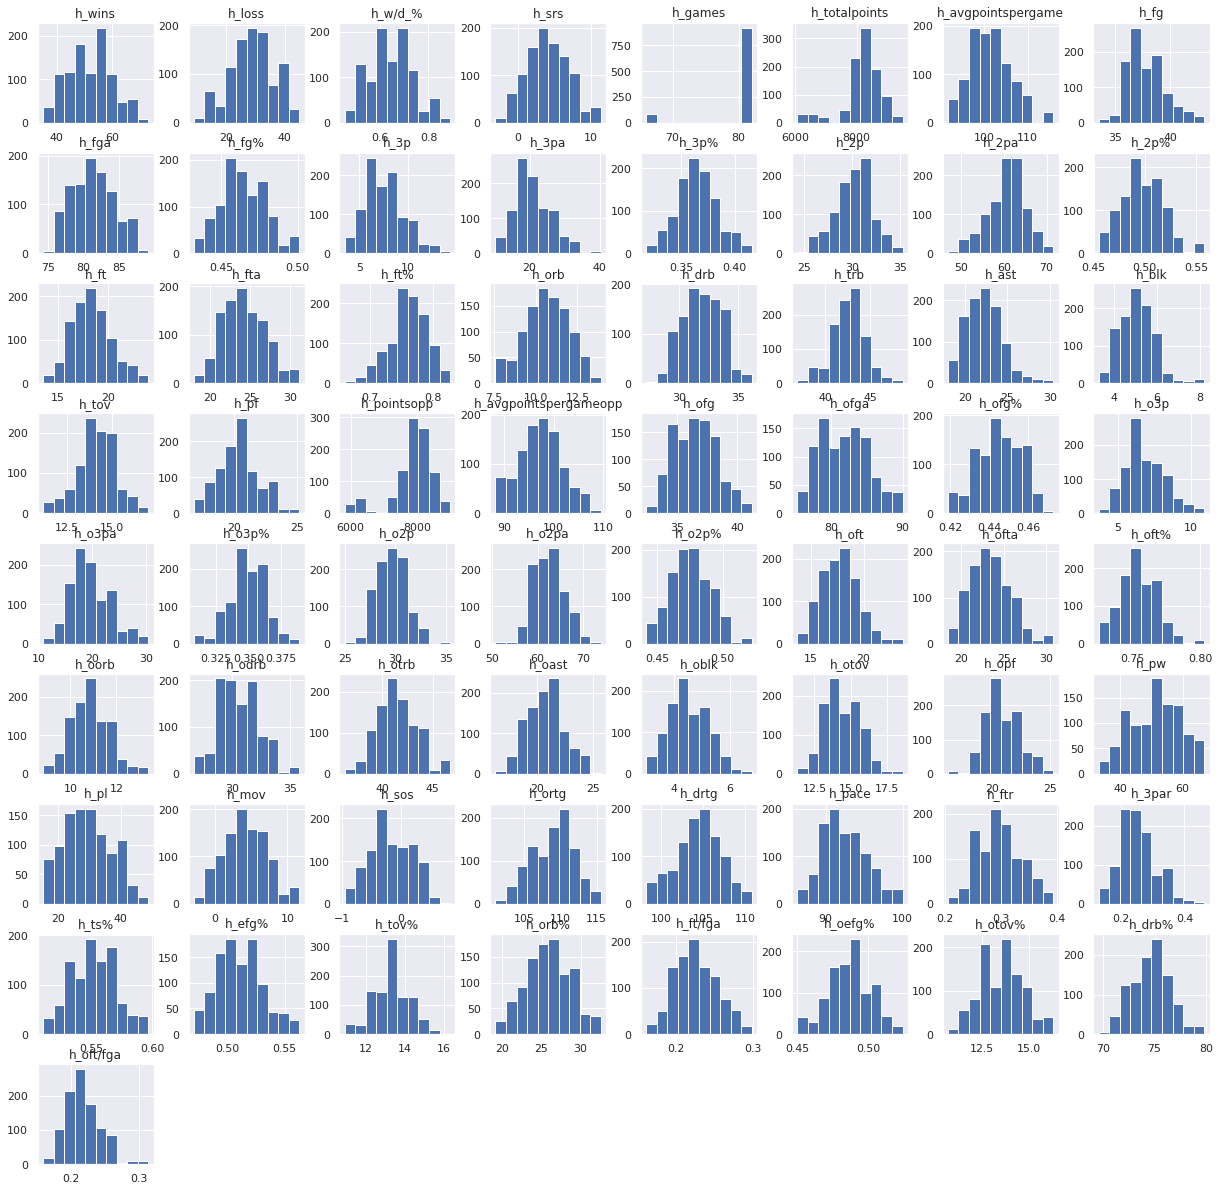

In [25]:
fig = plt.figure(figsize = (21, 21))
ax = fig.gca()

_hist = df_stat.hist(ax=ax)

> A maior parte das colunas tende a seguir uma distribuição normal.

Com essas informações, podemos prosseguir para a construção do modelo

---

# Modelos

In [26]:
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

from sklearn.feature_selection import VarianceThreshold, SequentialFeatureSelector
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, log_loss


## Funções auxiliares

In [27]:
from pprint import pprint
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, recall_score
from datetime import datetime

In [28]:
all_scores = {}

def show_scores(scores: dict = all_scores):
    display(pd.DataFrame(all_scores.values()))

def calculate_scores(
    model_name: str, 
    y_test: pd.Series, pred: np.ndarray, 
    pos_label: str or int = 1,
    score_list: list = all_scores,
    display_confusion_matrix: bool = True,
    display_scores: bool = True
    ):
    cf_mx = ConfusionMatrixDisplay.from_predictions(y_test, pred)
    acc = accuracy_score(y_test, pred)
    bacc = balanced_accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, pos_label=pos_label)
    recall = recall_score(y_test, pred, pos_label=pos_label)
    logloss = log_loss(y_test, pred)
    
    model_scores = {
        'model_name': model_name,
        'acc': acc,
        'bacc': bacc,
        'precision': precision,
        'recall': recall,
        'log_loss': logloss
    }
    score_list[model_name] = model_scores
    
    if display_confusion_matrix:
        display(cf_mx)   
    if show_scores:
        show_scores(score_list)
    return model_scores

def export_pred(model_name: str, raw_submission_set: pd.DataFrame, predictions):  
    predictions = np.vectorize({0: 'L', 1: 'W'}.get)(predictions)  # encode back
    
    submission = pd.DataFrame({
        'Game': raw_submission_set['game'],
        'WinOrLose': predictions
    })
    
    timestamp = datetime.strftime(datetime.now(), '%d-%m-%y_%H%M')
    submission.to_csv(f'/kaggle/working/{model_name}_{timestamp}.csv', index=False)

## Pré-processamento

In [29]:
def preprocess(
    train_set: pd.DataFrame,
    corr_column: str,
    corr_threshold: float,
    use_scaling: bool,

    submission_set: pd.DataFrame = None,
    target: str = 'winorlose',
    test_size: float = 0.3,
    use_all_cols: bool = False
):
    x = train_set.copy()
    y = train_set['winorlose']
    
    # Divisão em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, stratify=y, random_state=22)
    
    # Encoding das colunas 'h_teams' e 'a_teams'
    teams = list(set(x_train['h_team'].unique().tolist() + x_train['a_team'].unique().tolist()))

    le = LabelEncoder()
    le.fit(teams)
    x_train['h_team'] = le.transform(x_train['h_team'])
    x_train['a_team'] = le.transform(x_train['a_team'])

    x_test['h_team'] = le.transform(x_test['h_team'])
    x_test['a_team'] = le.transform(x_test['a_team'])
    
    # Encoding da coluna alvo
    le_y = LabelEncoder()
    y_train = le_y.fit_transform(y_train)
    y_test = le_y.fit_transform(y_test)
    
    # Seleção das colunas
    ## Correlação
    if not use_all_cols:
        _corr = df_train.corr()[corr_column]
        cols_corr = _corr[(_corr.values > corr_threshold) & (_corr.values != 1)].index.to_list()
        cols_to_use = cols_corr + [c.replace('h_', 'a_') for c in cols_corr] \
            + ['h_team', 'a_team']
    else:
        cols_to_use = df_train.columns.tolist()

    x_train = x_train[cols_to_use]
    x_test = x_test[cols_to_use]
    
    # Scaling das features numéricas
    if use_scaling:
        scaler = StandardScaler()
#         scaler = RobustScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
    
    x_submission = None
    if submission_set is not None:
        # Submissão
        if target in cols_to_use:
            cols_to_use.remove(target)
        x_submission = submission_set[cols_to_use]
        x_submission['h_team'] = le.transform(x_submission['h_team'])
        x_submission['a_team'] = le.transform(x_submission['a_team'])
        if use_scaling:
            x_submission = scaler.transform(x_submission)
    
    return x_train, y_train, x_test, y_test, x_submission

---

## Modelo 1: SVC

### 1.1: Basicão

#### Dados

In [30]:
x_train, y_train, x_test, y_test, x_submission = preprocess(
    train_set=df_train, submission_set=df_real_test, corr_column='h_w/d_%', corr_threshold=0.5, use_scaling=True
    )

,model_name,acc,bacc,precision,recall,log_loss
0,svc_basico,0.668874,0.562957,0.578947,0.207547,11.436723


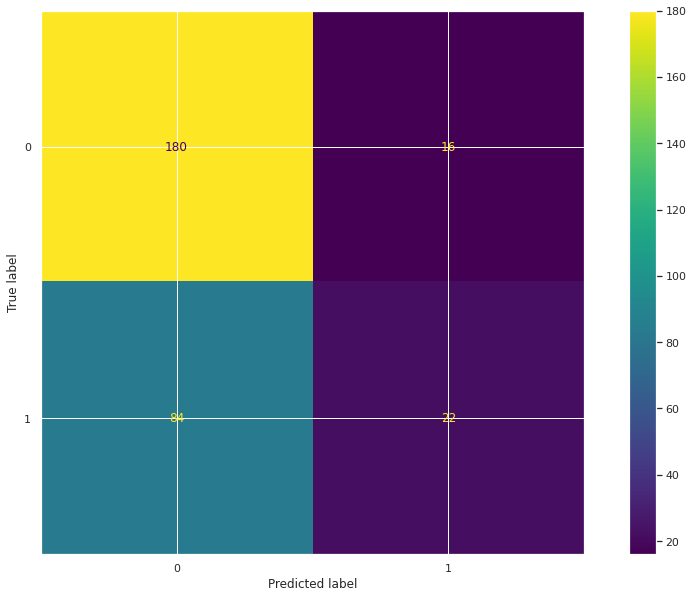

In [31]:
# model
svc = SVC(random_state=22)
svc.fit(x_train, y_train)
_pred = svc.predict(x_test)
_ = calculate_scores('svc_basico', y_test, _pred, pos_label=1)

In [32]:
svc_pred = svc.predict(x_submission)
export_pred('svc_basico', df_real_test, svc_pred)

### 1.2: GridSearchCV

In [33]:
param_grid = {
    'C': [0.1, 0.01],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'linear']
}

In [34]:
grid = GridSearchCV(
    SVC(random_state=22),
    param_grid, 
    refit=True, 
    verbose=1,
    cv=5, 
    scoring=make_scorer(accuracy_score),
    n_jobs=1
    )

grid.fit(x_train, y_train)
grid.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


0.6619452887537993

,model_name,acc,bacc,precision,recall,log_loss
0,svc_basico,0.668874,0.562957,0.578947,0.207547,11.436723
1,svc_gridsearchcv,0.649007,0.502166,0.500000,0.009434,12.122884


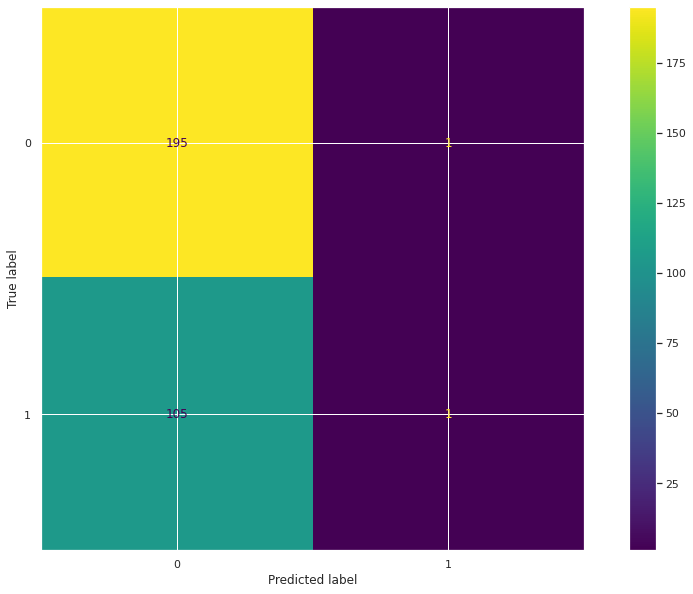

In [35]:
_pred = grid.predict(x_test)
_ = calculate_scores('svc_gridsearchcv', y_test, _pred, pos_label=1)

In [36]:
svc_cv_pred = grid.predict(x_submission)
export_pred('svc_gridsearchcv', df_real_test, svc_cv_pred)

## Modelo 2: PyTorch Tabular
<i> Agora vai </i>

In [37]:
!pip install pytorch_tabular[all]

     |████████████████████████████████| 2.0 MB 4.4 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 80 kB 7.6 MB/s             
     |████████████████████████████████| 9.5 MB 54.2 MB/s            
     |████████████████████████████████| 809 kB 47.2 MB/s            
     |████████████████████████████████| 74 kB 2.6 MB/s             
     |████████████████████████████████| 1.8 MB 50.7 MB/s            
     |████████████████████████████████| 13.2 MB 39.1 MB/s            
     |████████████████████████████████| 636 kB 57.5 MB/s            
     |████████████████████████████████| 97 kB 6.0 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 76 kB 4.2 MB/s             
     |████████████████████████████████| 112 kB 69.4 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=7c3ff5

In [38]:
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.tabular_model import TabularModel

### 2.1: LeakyReLU, correlação > 0.5

#### Dados

In [39]:
x_train, y_train, x_test, y_test, x_submission = preprocess(
    train_set=df_train, submission_set=df_real_test, corr_column='h_w/d_%', corr_threshold=0.5, use_scaling=False
    )

#### Adicionando a coluna alvo novamente ao x_train
Este modelo aceita tudo junto, e depois separa internamente

In [45]:
nn_x_train = x_train.copy()
nn_x_train['winorlose'] = y_train.copy()

nn_x_test = x_test.copy()
nn_x_test['winorlose'] = y_test.copy()

In [46]:
num_cols = nn_x_train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('winorlose')

cat_cols = nn_x_train.select_dtypes(exclude=np.number).columns.tolist()

In [56]:
data_cfg = DataConfig(
    target=['winorlose'],
    continuous_cols=num_cols,
    categorical_cols=cat_cols,
    num_workers=4
    )

trainer_cfg = TrainerConfig(
    auto_lr_find=True,
#     batch_size=128,
    batch_size=256,
    min_epochs=20,
    max_epochs=100
    )

optmizer_cfg = OptimizerConfig()

model_cfg = CategoryEmbeddingModelConfig(
    task='classification',
    layers='1024-512-256',
#     layers='512-256-128',
#     layers='256-128-64',
    activation='LeakyReLU',
    learning_rate=1e-4
    )

tabular_model = TabularModel(
    data_config=data_cfg,
    model_config=model_cfg,
    optimizer_config=optmizer_cfg,
    trainer_config=trainer_cfg
    )


tabular_model.fit(train=nn_x_train)
# tabular_model.evaluate(nn_x_test)

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
-------------------------

Validation sanity check: 0it [00:00, ?it/s]

Training: 6it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Generating Predictions...:   0%|          | 0/2 [00:00<?, ?it/s]

,model_name,acc,bacc,precision,recall,log_loss
0,svc_basico,0.665563,0.562572,0.560976,0.216981,11.551095
1,svc_gridsearchcv,0.649007,0.502166,0.500000,0.009434,12.122884
2,nn_tabularmodel_b256,0.658940,0.527147,0.600000,0.084906,11.779797


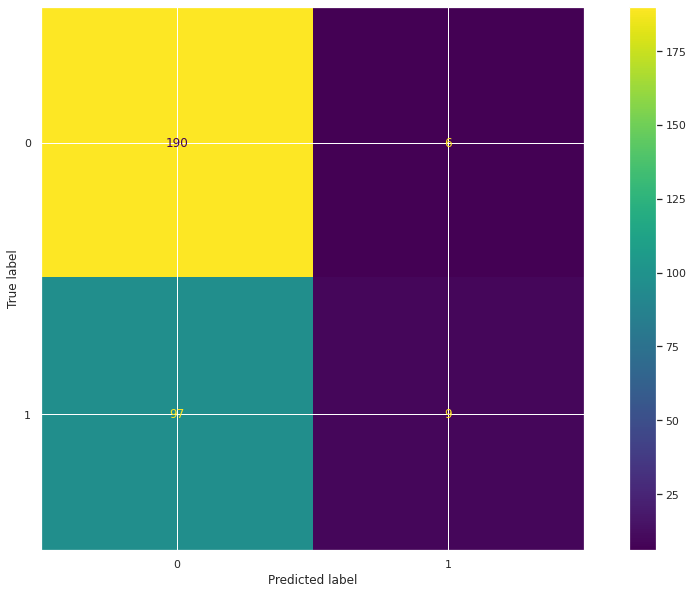

In [43]:
_preds = tabular_model.predict(nn_x_test)
_ = calculate_scores('nn_tabularmodel_last', y_test, _preds['prediction'])

In [57]:
tabular_model_pred = tabular_model.predict(x_submission)
# export_pred('tabular_relu', df_real_test, tabular_model_pred['prediction'])
export_pred('tabular_last', df_real_test, tabular_model_pred['prediction'])

Generating Predictions...:   0%|          | 0/2 [00:00<?, ?it/s]

In [58]:
tabular_model_pred['prediction'].value_counts()

0    93
1    72
Name: prediction, dtype: int64

### 2.2: ELU

In [45]:
data_cfg = DataConfig(
    target=['winorlose'],
    continuous_cols=num_cols,
    categorical_cols=cat_cols,
    num_workers=4
    )

trainer_cfg = TrainerConfig(
    auto_lr_find=True,
    batch_size=128,
    min_epochs=20,
    max_epochs=100
    )

optmizer_cfg = OptimizerConfig()

model_cfg = CategoryEmbeddingModelConfig(
    task='classification',
    layers='1024-512-256',
#     layers='512-256-128',
#     layers='256-128-64',
    activation='ELU',
    learning_rate=1e-4
    )

tabular_model = TabularModel(
    data_config=data_cfg,
    model_config=model_cfg,
    optimizer_config=optmizer_cfg,
    trainer_config=trainer_cfg
    )


tabular_model.fit(train=nn_x_train)
tabular_model.evaluate(nn_x_test)

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
-------------------------

Validation sanity check: 0it [00:00, ?it/s]

Training: 4it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5198675394058228}
--------------------------------------------------------------------------------


[{'test_accuracy': 0.5198675394058228}]

Generating Predictions...:   0%|          | 0/3 [00:00<?, ?it/s]

,model_name,acc,bacc,precision,recall,log_loss
0,svc_basico,0.665563,0.562572,0.560976,0.216981,11.551095
1,svc_gridsearchcv,0.649007,0.502166,0.500000,0.009434,12.122884
2,nn_tabularmodel_b256,0.658940,0.527147,0.600000,0.084906,11.779797
3,tabular_elu,0.519868,0.554293,0.392265,0.669811,16.583479


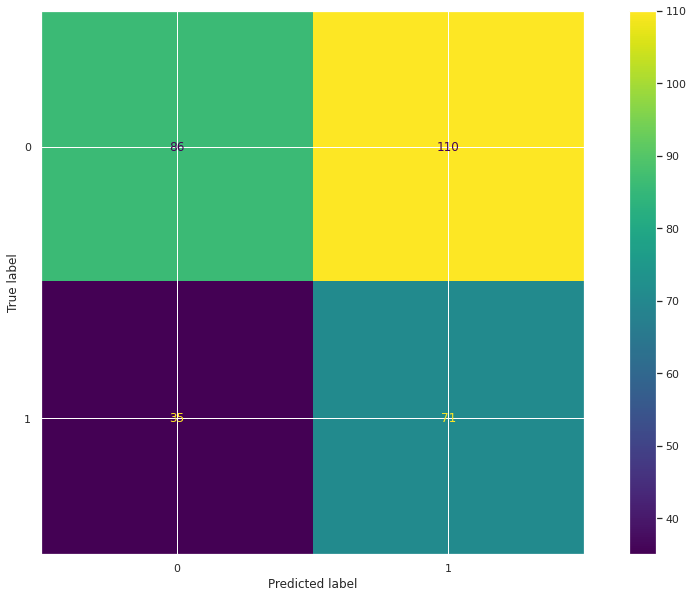

In [46]:
_preds = tabular_model.predict(nn_x_test)
_ = calculate_scores('tabular_elu', y_test, _preds['prediction'])

In [47]:
tabular_model_pred = tabular_model.predict(x_submission)
export_pred('tabular_elu', df_real_test, tabular_model_pred['prediction'])

Generating Predictions...:   0%|          | 0/2 [00:00<?, ?it/s]

### 2.3: Utilizando com mais <i> features </i>
Testando com correlação > 0.3

#### Pré-processamento tudo de novo
Divisão em treino e teste, encoding das colunas 'h_teams' e 'a_teams', encoding da coluna alvo, seleção das colunas e scaling das <i> features </i> numéricas

In [48]:
x_train, y_train, x_test, y_test, x_submission = preprocess(
    train_set=df_train, submission_set=df_real_test, corr_column='h_w/d_%', corr_threshold=0.3, use_scaling=False
    )

In [49]:
nn_x_train = x_train.copy()
nn_x_train['winorlose'] = y_train.copy()

nn_x_test = x_test.copy()
nn_x_test['winorlose'] = y_test.copy()

In [50]:
num_cols = nn_x_train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('winorlose')

cat_cols = nn_x_train.select_dtypes(exclude=np.number).columns.tolist()

In [51]:
data_cfg = DataConfig(
    target=['winorlose'],
    continuous_cols=num_cols,
    categorical_cols=cat_cols,
    num_workers=4
    )

trainer_cfg = TrainerConfig(
    auto_lr_find=True,
    batch_size=128,
    min_epochs=20,
    max_epochs=100
    )

optmizer_cfg = OptimizerConfig()

model_cfg = CategoryEmbeddingModelConfig(
    task='classification',
    layers='1024-512-256',
#     layers='512-256-128',
#     layers='256-128-64',
    activation='LeakyReLU',
    learning_rate=1e-4
    )

tabular_model = TabularModel(
    data_config=data_cfg,
    model_config=model_cfg,
    optimizer_config=optmizer_cfg,
    trainer_config=trainer_cfg
    )


tabular_model.fit(train=nn_x_train)
tabular_model.evaluate(nn_x_test)

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
-------------------------

Validation sanity check: 0it [00:00, ?it/s]

Training: 2it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.374172180891037}
--------------------------------------------------------------------------------


[{'test_accuracy': 0.374172180891037}]

Generating Predictions...:   0%|          | 0/3 [00:00<?, ?it/s]

,model_name,acc,bacc,precision,recall,log_loss
0,svc_basico,0.665563,0.562572,0.560976,0.216981,11.551095
1,svc_gridsearchcv,0.649007,0.502166,0.500000,0.009434,12.122884
2,nn_tabularmodel_b256,0.658940,0.527147,0.600000,0.084906,11.779797
3,tabular_elu,0.519868,0.554293,0.392265,0.669811,16.583479
4,nn_tabularmodel_lower_corr,0.374172,0.481036,0.340996,0.839623,21.615782


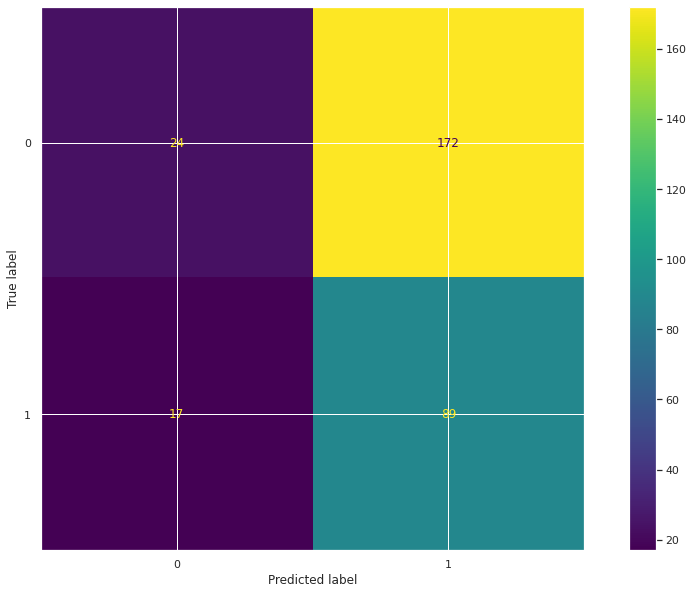

In [52]:
_preds = tabular_model.predict(nn_x_test)
_ = calculate_scores('nn_tabularmodel_lower_corr', y_test, _preds['prediction'])

In [53]:
tabular_model_pred = tabular_model.predict(x_submission)
export_pred('tabular_relu_low_corr', df_real_test, tabular_model_pred['prediction'])

Generating Predictions...:   0%|          | 0/2 [00:00<?, ?it/s]

### 2.4: Ainda com mais <i> features </i>
Todas, na verdade

#### Pré-processamento tudo de novo
Divisão em treino e teste, encoding das colunas 'h_teams' e 'a_teams', encoding da coluna alvo, seleção das colunas e scaling das <i> features </i> numéricas

In [54]:
x_train, y_train, x_test, y_test, x_submission = preprocess(
    train_set=df_train, submission_set=df_real_test, corr_column='h_w/d_%', corr_threshold=0, use_scaling=False, use_all_cols=True
    )

In [55]:
nn_x_train = x_train.copy()
nn_x_train['winorlose'] = y_train.copy()

nn_x_test = x_test.copy()
nn_x_test['winorlose'] = y_test.copy()

In [56]:
num_cols = nn_x_train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('winorlose')

cat_cols = nn_x_train.select_dtypes(exclude=np.number).columns.tolist()

In [57]:
data_cfg = DataConfig(
    target=['winorlose'],
    continuous_cols=num_cols,
    categorical_cols=cat_cols,
    num_workers=4
    )

trainer_cfg = TrainerConfig(
    auto_lr_find=True,
    batch_size=128,
    min_epochs=200,
    max_epochs=1000
    )

optmizer_cfg = OptimizerConfig()

model_cfg = CategoryEmbeddingModelConfig(
    task='classification',
    layers='1024-512-256',
#     layers='512-256-128',
#     layers='256-128-64',
    activation='LeakyReLU',
    learning_rate=1e-4
    )

tabular_model = TabularModel(
    data_config=data_cfg,
    model_config=model_cfg,
    optimizer_config=optmizer_cfg,
    trainer_config=trainer_cfg
    )


tabular_model.fit(train=nn_x_train)
tabular_model.evaluate(nn_x_test)

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
-------------------------

Validation sanity check: 0it [00:00, ?it/s]

Training: 3it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6490066051483154}
--------------------------------------------------------------------------------


[{'test_accuracy': 0.6490066051483154}]

Generating Predictions...:   0%|          | 0/3 [00:00<?, ?it/s]

,model_name,acc,bacc,precision,recall,log_loss
0,svc_basico,0.665563,0.562572,0.560976,0.216981,11.551095
1,svc_gridsearchcv,0.649007,0.502166,0.500000,0.009434,12.122884
2,nn_tabularmodel_b256,0.658940,0.527147,0.600000,0.084906,11.779797
3,tabular_elu,0.519868,0.554293,0.392265,0.669811,16.583479
4,nn_tabularmodel_lower_corr,0.374172,0.481036,0.340996,0.839623,21.615782
5,nn_tabularmodel_all_cols,0.649007,0.534655,0.500000,0.150943,12.122924


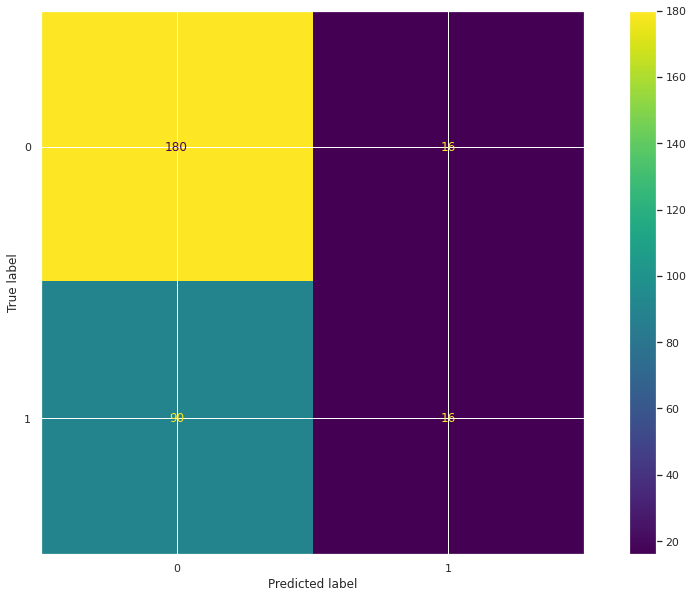

In [58]:
_preds = tabular_model.predict(nn_x_test)
_ = calculate_scores('nn_tabularmodel_all_cols', y_test, _preds['prediction'])

In [ ]:
!pip install pandas==1.3.5

In [59]:
tabular_model_pred = tabular_model.predict(x_submission)
export_pred('nn_tabularmodel_all_cols', df_real_test, tabular_model_pred['prediction'])

Generating Predictions...:   0%|          | 0/2 [00:00<?, ?it/s]

### 3: TabNet

In [60]:
from pytorch_tabular.models import TabNetModelConfig

In [61]:
x_train, y_train, x_test, y_test, x_submission = preprocess(
    train_set=df_train, submission_set=df_real_test, corr_column='h_w/d_%', corr_threshold=0.5, use_scaling=False
    )

In [62]:
nn_x_train = x_train.copy()
nn_x_train['winorlose'] = y_train.copy()

nn_x_test = x_test.copy()
nn_x_test['winorlose'] = y_test.copy()

In [63]:
num_cols = nn_x_train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('winorlose')

cat_cols = nn_x_train.select_dtypes(exclude=np.number).columns.tolist()

In [64]:
data_cfg = DataConfig(
    target=['winorlose'],
    continuous_cols=num_cols,
    categorical_cols=cat_cols,
    num_workers=4
    )

trainer_cfg = TrainerConfig(
    auto_lr_find=True,
    batch_size=512,
    min_epochs=20,
    max_epochs=100
    )

optmizer_cfg = OptimizerConfig()

model_cfg = TabNetModelConfig(
    task='classification',
    learning_rate=1e-4,
    n_d=32,
    n_a=32,
    n_steps=3,
    gamma=1.4
#     virtual_batch_size=128    
    )

tabular_model = TabularModel(
    data_config=data_cfg,
    model_config=model_cfg,
    optimizer_config=optmizer_cfg,
    trainer_config=trainer_cfg
    )


tabular_model.fit(train=nn_x_train)
tabular_model.evaluate(nn_x_test)

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
-------------------------

Validation sanity check: 0it [00:00, ?it/s]

Training: 1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6490066051483154}
--------------------------------------------------------------------------------


[{'test_accuracy': 0.6490066051483154}]

Generating Predictions...:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model_name,acc,bacc,precision,recall,log_loss
0,svc_basico,0.665563,0.562572,0.560976,0.216981,11.551095
1,svc_gridsearchcv,0.649007,0.502166,0.500000,0.009434,12.122884
2,nn_tabularmodel_b256,0.658940,0.527147,0.600000,0.084906,11.779797
3,tabular_elu,0.519868,0.554293,0.392265,0.669811,16.583479
4,nn_tabularmodel_lower_corr,0.374172,0.481036,0.340996,0.839623,21.615782
5,nn_tabularmodel_all_cols,0.649007,0.534655,0.500000,0.150943,12.122924
6,nn_tabnet,0.649007,0.500000,0.000000,0.000000,12.122882


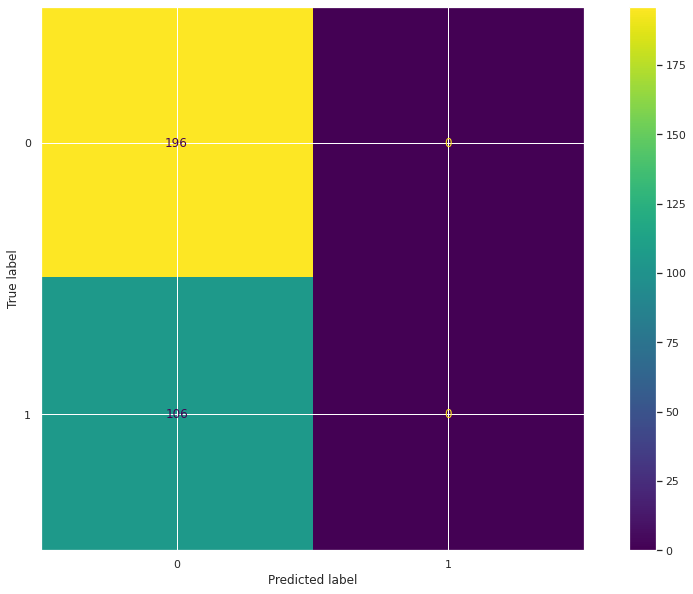

In [65]:
_preds = tabular_model.predict(nn_x_test)
_ = calculate_scores('nn_tabnet', y_test, _preds['prediction'])

In [66]:
tabular_model_pred = tabular_model.predict(x_submission)
export_pred('tabnet', df_real_test, tabular_model_pred['prediction'])

Generating Predictions...:   0%|          | 0/1 [00:00<?, ?it/s]

# Submissão

In [42]:
df_real_test

,game,data,h_team,h_wins,h_loss,h_w/d_%,h_srs,h_games,h_totalpoints,h_avgpointspergame,...,a_3par,a_ts%,a_efg%,a_tov%,a_orb%,a_ft/fga,a_oefg%,a_otov%,a_drb%,a_oft/fga
0,0,"Thu, May 30",Golden State Warriors,57,25,0.695,6.42,82,9650,117.7,...,0.379,0.579,0.543,12.4,21.9,0.198,0.509,13.1,77.1,0.190
1,1,"Sun, June 2",Golden State Warriors,57,25,0.695,6.42,82,9650,117.7,...,0.379,0.579,0.543,12.4,21.9,0.198,0.509,13.1,77.1,0.190
2,2,"Wed, June 5",Toronto Raptors,58,24,0.707,5.49,82,9384,114.4,...,0.384,0.596,0.565,12.6,22.5,0.182,0.508,11.7,77.1,0.205
3,3,"Fri, June 7",Toronto Raptors,58,24,0.707,5.49,82,9384,114.4,...,0.384,0.596,0.565,12.6,22.5,0.182,0.508,11.7,77.1,0.205
4,4,"Mon, June 10",Golden State Warriors,57,25,0.695,6.42,82,9650,117.7,...,0.379,0.579,0.543,12.4,21.9,0.198,0.509,13.1,77.1,0.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,160,"Tue, August 18",Portland Trail Blazers,35,39,0.473,-0.61,74,8508,115.0,...,0.358,0.573,0.542,13.3,24.5,0.201,0.515,14.1,78.8,0.205
161,161,"Thu, August 20",Portland Trail Blazers,35,39,0.473,-0.61,74,8508,115.0,...,0.358,0.573,0.542,13.3,24.5,0.201,0.515,14.1,78.8,0.205
162,162,"Sat, August 22",Los Angeles Lakers,52,19,0.732,6.28,71,8054,113.4,...,0.374,0.570,0.533,11.2,22.4,0.194,0.530,11.2,75.3,0.208
163,163,"Mon, August 24",Los Angeles Lakers,52,19,0.732,6.28,71,8054,113.4,...,0.374,0.570,0.533,11.2,22.4,0.194,0.530,11.2,75.3,0.208


In [43]:
x_train = df_train.copy()
y_train = df_train.copy()['winorlose']

teams = list(set(x_train['h_team'].unique().tolist() + x_train['a_team'].unique().tolist()))

le = LabelEncoder()
le.fit(teams)
x_train['h_team'] = le.transform(x_train['h_team'])
x_train['a_team'] = le.transform(x_train['a_team'])

# Encoding da coluna alvo
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)

# Seleção das colunas
## Correlação

_corr = df_train.corr()['h_w/d_%']
cols_corr = _corr[(_corr.values > 0.5) & (_corr.values != 1)].index.to_list()
cols_to_use = cols_corr + [c.replace('h_', 'a_') for c in cols_corr] \
    + ['h_team', 'a_team']

x_train = x_train[cols_to_use]

nn_x_train = x_train.copy()
nn_x_train['winorlose'] = y_train.copy()

num_cols = nn_x_train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('winorlose')

cat_cols = nn_x_train.select_dtypes(exclude=np.number).columns.tolist()

In [52]:
x_submission = df_real_test.copy()

x_submission['h_team'] = le.transform(x_submission['h_team'])
x_submission['a_team'] = le.transform(x_submission['a_team'])

# Seleção das colunas
x_submission = x_submission[cols_to_use]

In [49]:
cfg = DataConfig(
    target=['winorlose'],
    continuous_cols=num_cols,
    categorical_cols=cat_cols,
    num_workers=4
    )

trainer_cfg = TrainerConfig(
    auto_lr_find=True,
#     batch_size=128,
    batch_size=256,
    min_epochs=20,
    max_epochs=100
    )

optmizer_cfg = OptimizerConfig()

model_cfg = CategoryEmbeddingModelConfig(
    task='classification',
    layers='1024-512-256',
#     layers='512-256-128',
#     layers='256-128-64',
    activation='LeakyReLU',
    learning_rate=1e-4
    )

tabular_model = TabularModel(
    data_config=data_cfg,
    model_config=model_cfg,
    optimizer_config=optmizer_cfg,
    trainer_config=trainer_cfg
    )


tabular_model.fit(train=nn_x_train)
# tabular_model.evaluate(nn_x_test)

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
-------------------------

Validation sanity check: 0it [00:00, ?it/s]

Training: 3it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [55]:
tabular_model_pred = tabular_model.predict(x_submission)
# export_pred('tabular_relu', df_real_test, tabular_model_pred['prediction'])
export_pred('tabular_last', df_real_test, tabular_model_pred['prediction'])

Generating Predictions...:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
tabular_model_pred['prediction'].value_counts()

0    156
1      9
Name: prediction, dtype: int64